In [1]:
#importing packages

import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import keras
from keras import layers
import keras.backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [12]:
model = keras.models.load_model(r"C:\Users\user\Desktop\5 class genre model\best_genre_model_loss")

In [3]:
def probability(y):
    
    test_dataset = []
    length = len(y)
    for j in range(1000):
        if (j+1)*5*22050<=length:
            test_dataset.append(y[j*5*22050:(j+1)*5*22050]/np.amax(np.abs(y[j*5*22050:(j+1)*5*22050])))
            
    total_no_test = len(test_dataset)
    
    zcr_test = np.zeros((total_no_test,216))
    centroid_test = np.zeros((total_no_test,216))
    rolloff_test = np.zeros((total_no_test,216))
    bandwidth_test = np.zeros((total_no_test,216))
    mfcc_test = np.zeros((total_no_test,20,216,1))

    for i in range(total_no_test):
        zcr_test[i] = librosa.feature.zero_crossing_rate(test_dataset[i])[0]
        centroid_test[i] = librosa.feature.spectral_centroid(y=test_dataset[i], sr=22050)[0]
        rolloff_test[i] = librosa.feature.spectral_rolloff(y=test_dataset[i], sr=22050)[0]
        bandwidth_test[i]= librosa.feature.spectral_bandwidth(y=test_dataset[i], sr=22050)[0]
        mfcc_test[i,:,:,0] = librosa.power_to_db(librosa.feature.mfcc(y=test_dataset[i], sr=22050), ref=np.max)/80 + 1
        
    numeric_features_test = np.zeros((total_no_test,4,216,1))
    numeric_features_test[:,0,:,0] = zcr_test
    numeric_features_test[:,1,:,0] = centroid_test/11025
    numeric_features_test[:,2,:,0] = rolloff_test/11025
    numeric_features_test[:,3,:,0] = bandwidth_test/11025
    
    return (model.predict([numeric_features_test,mfcc_test]))

In [16]:
def plot_prob(path):
    y,sr = librosa.load(path, sr = 22050)
    prob = probability(y)
    x=np.array(['metal','blues','classical','hiphop','pop'])
    row = np.shape(prob)
    rows=row[0]
    column_sums=(prob.sum(axis=0))/rows
    max_1=np.argmax(column_sums)
    print("The song is probably " + str(x[max_1]) + ".")
    plt.figure(figsize=(10,7))
    plt.bar(x,column_sums*100,width=0.5)
    plt.title('GENRE CLASSIFICATION')
    plt.xlabel('GENRES')
    plt.ylabel('PERCENTAGE')
    plt.grid()
    plt.show()

     billie.wav
The song is probably hiphop.


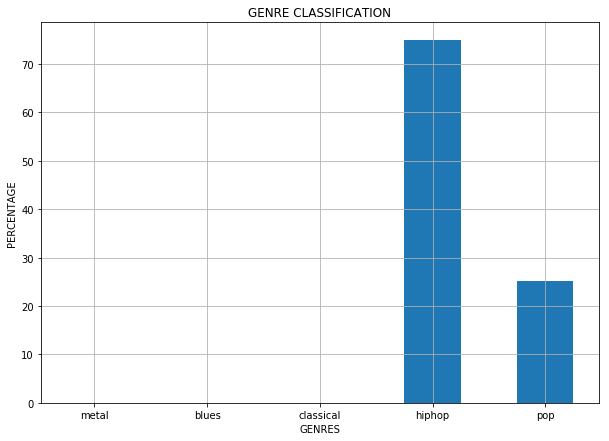

     bohemian.wav
The song is probably hiphop.


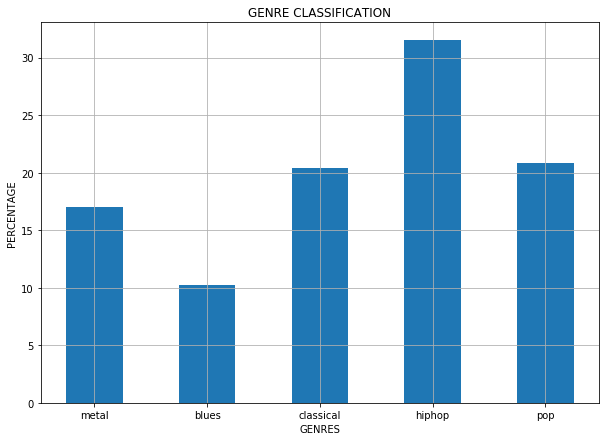

     flight.wav
The song is probably classical.


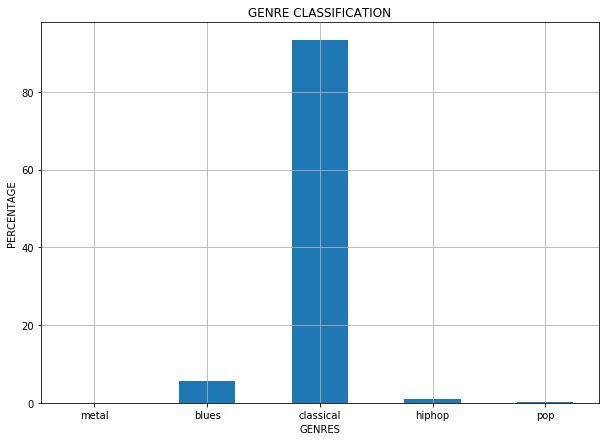

     holy.wav
The song is probably metal.


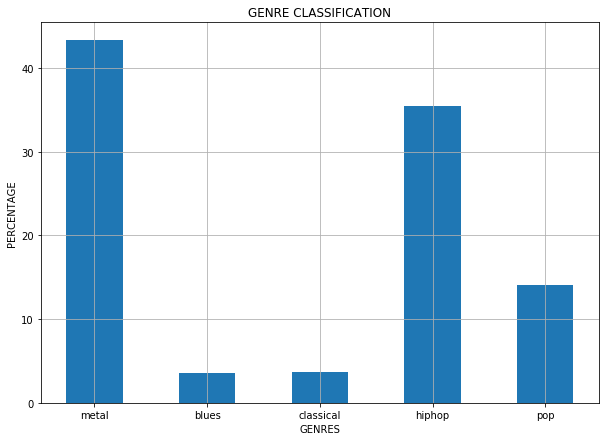

     slim.wav
The song is probably hiphop.


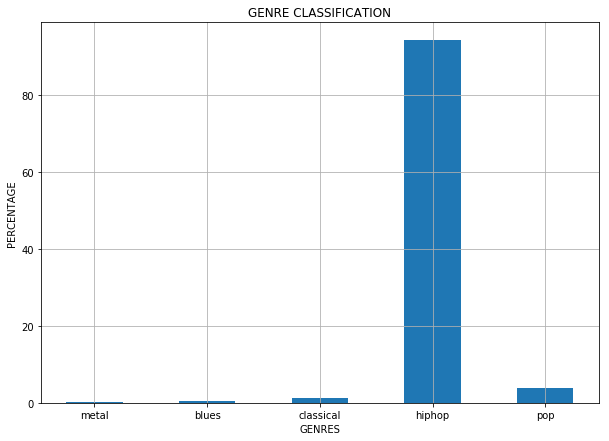

     thrill.wav
The song is probably blues.


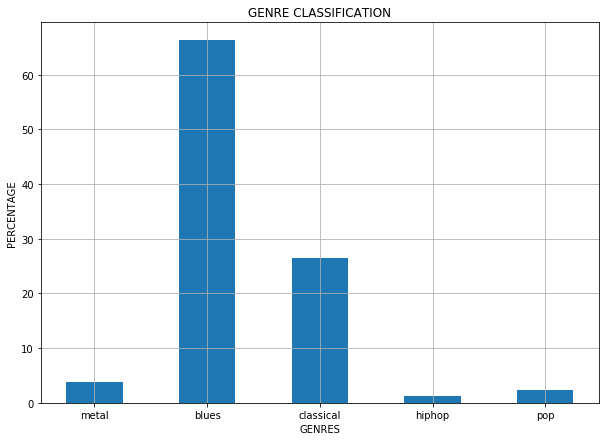

In [19]:
for i in os.listdir(r"C:\Users\user\Desktop\test_music"):
    print("     " + i)
    plot_prob(r"C:\Users\user\Desktop\test_music" + "\\" + i)